In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [5]:
#import the data
df = pd.read_csv(r"C:\Users\NEHA1\Documents\data science\Feature engineering\Titanic-Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
#finding how many null values present in the features
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

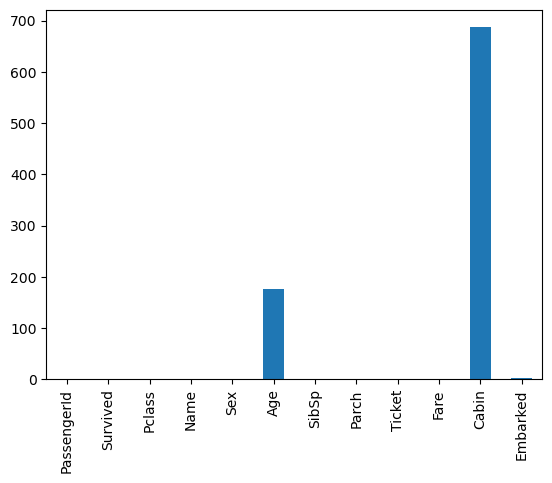

In [7]:
# visualization of the null values
df.isnull().sum().plot.bar()

<Axes: >

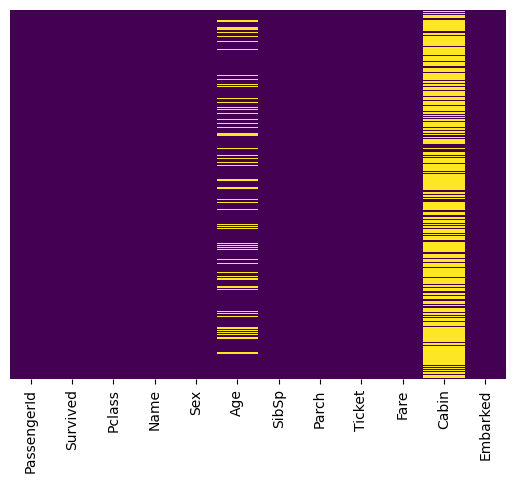

In [8]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Roughly 20 percent of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. Looking at the Cabin column, it looks like we are just missing too much of that data to do something useful with at a basic level. We'll probably drop this later, or change it to another feature like "Cabin Known: 1 or 0"

In [9]:
df.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

<Axes: xlabel='Survived', ylabel='count'>

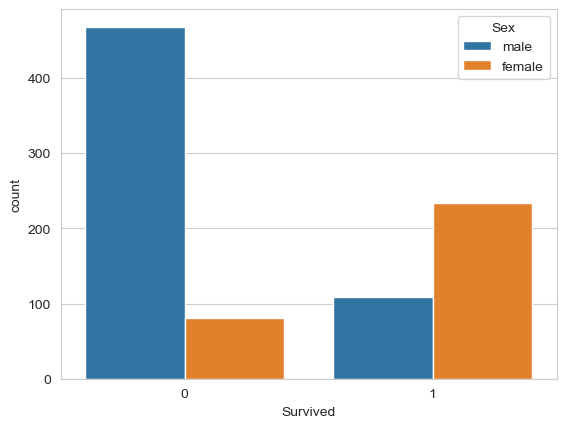

In [10]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=df)

Here we can see that the males are died more then the females

<Axes: xlabel='Survived', ylabel='count'>

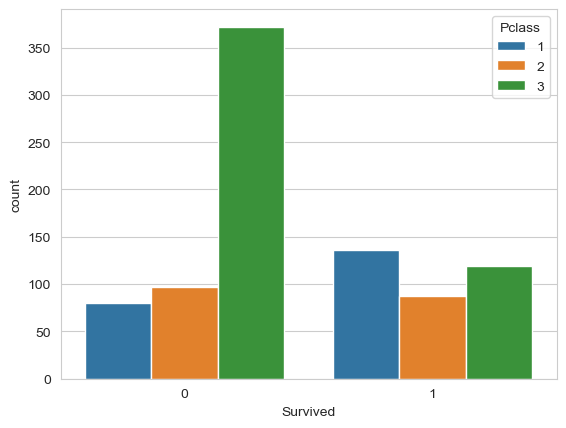

In [11]:
# now we see which class passenger died more
sns.set_style('whitegrid')
sns.countplot(data=df, hue='Pclass', x='Survived')

Here, we can see that the pclass 3 died more and the pclass 1 suvived more

<Axes: xlabel='Age', ylabel='Count'>

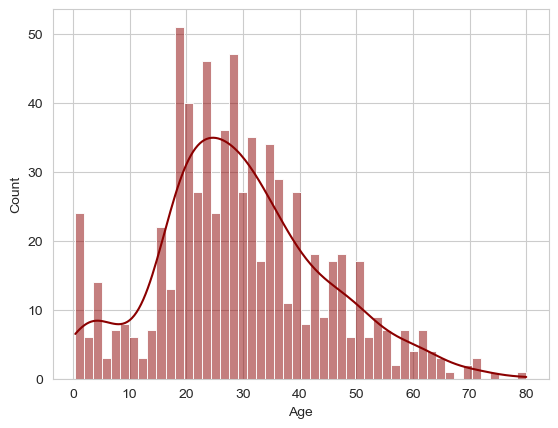

In [12]:
#now we see the distrinution of passenger's age 
sns.histplot(df['Age'].dropna(),kde=True,color='darkred',bins=50, alpha= 0.5)

<Axes: xlabel='Pclass', ylabel='Age'>

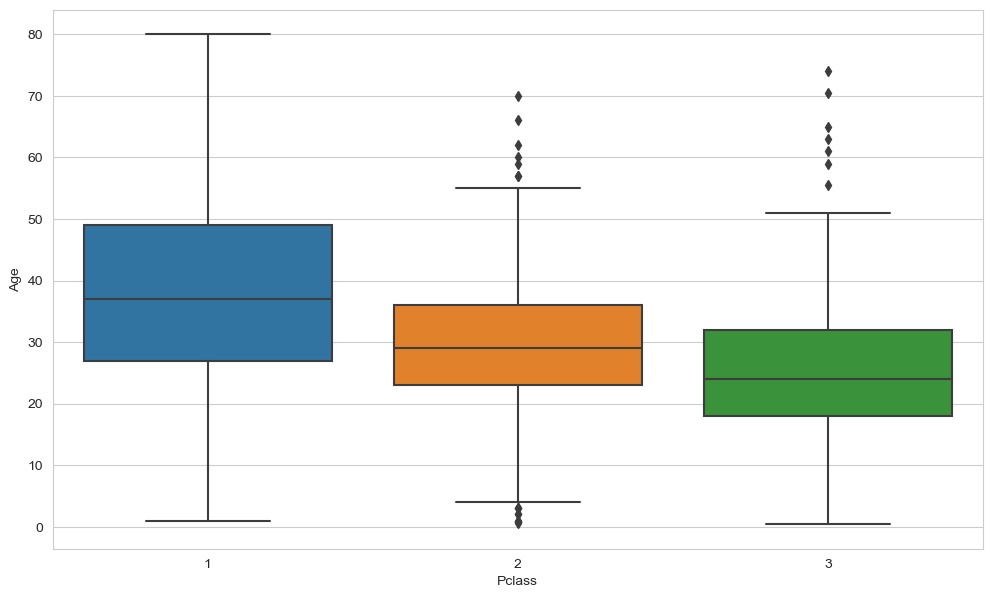

In [13]:
#We have to fill in missing age data instead of just dropping the missing age data rows.

plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=df)

In [14]:
#so we impute the missing age data as the mean 

df.groupby(['Pclass'])['Age'].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [15]:
# we make a function to impute the missing age data

def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 38

        elif Pclass == 2:
            return 30

        else:
            return 25

    else:
        return Age

In [16]:
df['Age'] = df[['Age','Pclass']].apply(impute_age,axis=1)

In [17]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [18]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
#before we remove the missing values from the Cabin we will deal with the sex and Embarked column by performing one hot encoding

df['male']=pd.get_dummies(df['Sex'], drop_first=True).astype(int)
df



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,25.0,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1


In [20]:
df.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [21]:
df.Embarked.isnull().value_counts() 

Embarked
False    889
True       2
Name: count, dtype: int64

In [22]:
# so we have to drop the missing values 
df.Embarked.dropna(inplace = True)

In [23]:
# now we have to peform one hot encoding on embarked feature
df1 =pd.DataFrame(pd.get_dummies(df['Embarked'], drop_first=True).astype(int))
df1

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [24]:
df = pd.concat([df,df1],axis=1)

In [25]:
# now we can drop both the column sex and Embarked
df.drop(['Sex', 'Embarked'], inplace = True, axis=1)   # we have already drop both so its showing error

In [26]:
df

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,NaN,1,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",25.0,1,2,W./C. 6607,23.4500,NaN,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,1,0,0


In [27]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
male             0
Q                0
S                0
dtype: int64

In [28]:
# for the cabin we have seen that the no.of missing is too large so we will also drop that column

df.drop(['Cabin'], axis =1, inplace=True)

In [29]:
df

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,1,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",25.0,1,2,W./C. 6607,23.4500,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,1,0,0


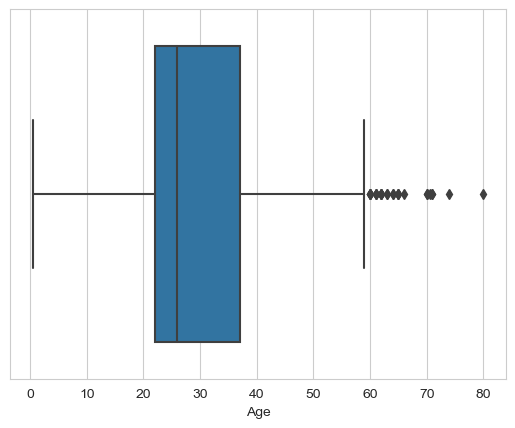

In [45]:
## check for the outliers using box plot

sns.boxplot(x=df["Age"])
plt.show()

In [47]:
q1 = df['Age'].quantile(0.25)
q3 = df['Age'].quantile(0.75)
iqr = q3 - q1
upper = q3 + 1.5 * iqr
lowwer = q1 - 1.5 * iqr

In [49]:
df[(df["Age"] < lowwer) | (df["Age"] > upper)]

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,male,Q,S
33,34,0,2,"Wheadon, Mr. Edward H",66.0,0,0,C.A. 24579,10.5000,1,0,1
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",65.0,0,1,113509,61.9792,1,0,0
96,97,0,1,"Goldschmidt, Mr. George B",71.0,0,0,PC 17754,34.6542,1,0,0
116,117,0,3,"Connors, Mr. Patrick",70.5,0,0,370369,7.7500,1,1,0
170,171,0,1,"Van der hoef, Mr. Wyckoff",61.0,0,0,111240,33.5000,1,0,1
252,253,0,1,"Stead, Mr. William Thomas",62.0,0,0,113514,26.5500,1,0,1
275,276,1,1,"Andrews, Miss. Kornelia Theodosia",63.0,1,0,13502,77.9583,0,0,1
280,281,0,3,"Duane, Mr. Frank",65.0,0,0,336439,7.7500,1,1,0
326,327,0,3,"Nysveen, Mr. Johan Hansen",61.0,0,0,345364,6.2375,1,0,1
366,367,1,1,"Warren, Mrs. Frank Manley (Anna Sophia Atkinson)",60.0,1,0,110813,75.2500,0,0,0


In [52]:
# replacing the outlier using the capped method

from scipy.stats import mstats
df_capped =df.apply(lambda x: mstats.winsorize(x, limits=[0.05, 0.05]))

In [53]:
df_capped

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,male,Q,S
0,45,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,1,0,1
1,45,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,0,0,0
2,45,1,3,"Heikkinen, Miss. Laina",26.0,0,0,SOTON/O.Q. 3101311,7.9250,0,0,1
3,45,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,0,0,1
4,45,0,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",35.0,0,0,373450,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,847,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,1,0,1
887,847,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,113760,30.0000,0,0,1
888,847,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",25.0,1,2,SOTON/O.Q. 3101311,23.4500,0,0,1
889,847,1,1,"Behr, Mr. Karl Howell",26.0,0,0,113760,30.0000,1,0,0


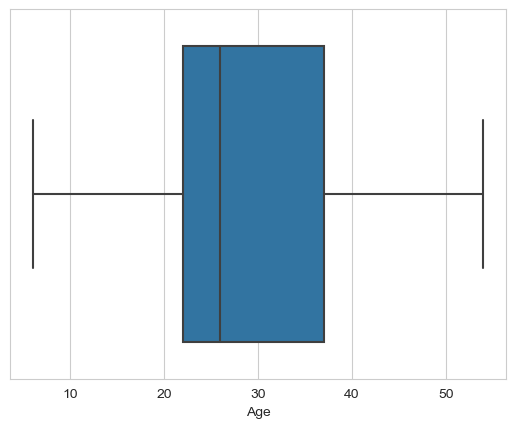

In [56]:
# here we can see that the outliers are removed 
sns.boxplot(x=df_capped["Age"])
plt.show()

In [61]:
df_capped.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
male           0
Q              0
S              0
dtype: int64

In [65]:
#Standardization

# we have to drop name and Ticket feature beacuse they are dtypes is str
df_capped.drop(['Name'], axis=1, inplace=True)
df_capped.drop(['Ticket'], axis=1, inplace=True)

In [66]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
df_scaled= scaler.fit_transform(df_capped)

In [72]:
df_standardscaler = pd.DataFrame(df_scaled, columns=df_capped.columns)

In [73]:
df_standardscaler


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,-1.581285,-0.789272,0.827377,-0.591644,0.695388,-0.521469,-0.706066,0.737695,-0.307562,0.619306
1,-1.581285,1.266990,-1.566107,0.749078,0.695388,-0.521469,1.481461,-1.355574,-0.307562,-1.614710
2,-1.581285,1.266990,0.827377,-0.256464,-0.574265,-0.521469,-0.683006,-1.355574,-0.307562,0.619306
3,-1.581285,1.266990,-1.566107,0.497692,0.695388,-0.521469,0.860277,-1.355574,-0.307562,0.619306
4,-1.581285,-0.789272,0.827377,0.497692,-0.574265,-0.521469,-0.678736,0.737695,-0.307562,0.619306
...,...,...,...,...,...,...,...,...,...,...
886,1.581285,-0.789272,-0.369365,-0.172669,-0.574265,-0.521469,-0.509633,0.737695,-0.307562,0.619306
887,1.581285,1.266990,-1.566107,-0.843030,-0.574265,-0.521469,0.071127,-1.355574,-0.307562,0.619306
888,1.581285,-0.789272,0.827377,-0.340259,0.695388,2.495604,-0.152636,-1.355574,-0.307562,0.619306
889,1.581285,1.266990,-1.566107,-0.256464,-0.574265,-0.521469,0.071127,0.737695,-0.307562,-1.614710


(array([ 54.,  10.,   7.,  12.,  56.,  40.,  52., 206.,  36.,  83.,  37.,
         33.,  47.,  55.,  34.,  14.,  17.,  24.,  17.,  57.]),
 array([-1.93236646, -1.73125815, -1.53014984, -1.32904153, -1.12793322,
        -0.92682491, -0.7257166 , -0.52460829, -0.32349998, -0.12239167,
         0.07871664,  0.27982495,  0.48093326,  0.68204157,  0.88314988,
         1.08425819,  1.2853665 ,  1.48647481,  1.68758312,  1.88869143,
         2.08979974]),
 <BarContainer object of 20 artists>)

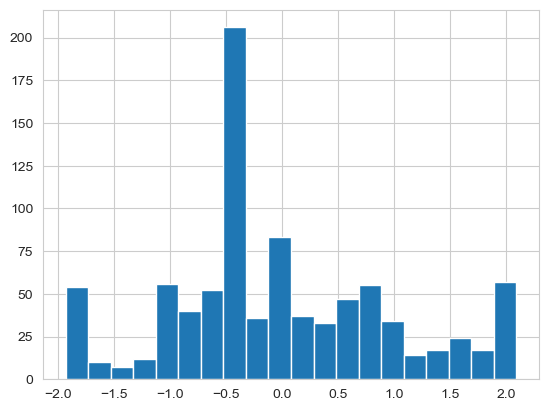

In [74]:
plt.hist(df_standardscaler['Age'], bins=20)

(array([384., 115.,  44.,  96.,  47.,  20.,  14.,  10.,  20.,  19.,   6.,
         11.,   9.,  22.,  11.,   8.,   2.,   0.,   2.,  51.]),
 array([-0.70692012, -0.52577432, -0.34462852, -0.16348271,  0.01766309,
         0.1988089 ,  0.3799547 ,  0.5611005 ,  0.74224631,  0.92339211,
         1.10453792,  1.28568372,  1.46682952,  1.64797533,  1.82912113,
         2.01026694,  2.19141274,  2.37255854,  2.55370435,  2.73485015,
         2.91599596]),
 <BarContainer object of 20 artists>)

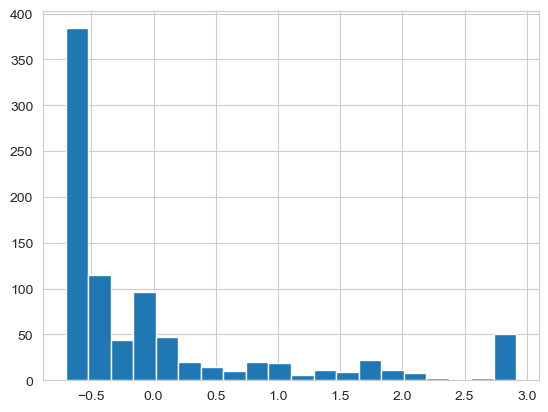

In [75]:
plt.hist(df_standardscaler['Fare'], bins=20)

In [82]:
# from above we can see that the graph is right skewed 
# so we use lograthmic transformation

import scipy.stats as stat 
import pylab
def plot_data(df, feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature], dist='norm', plot=pylab)
    plt.show()

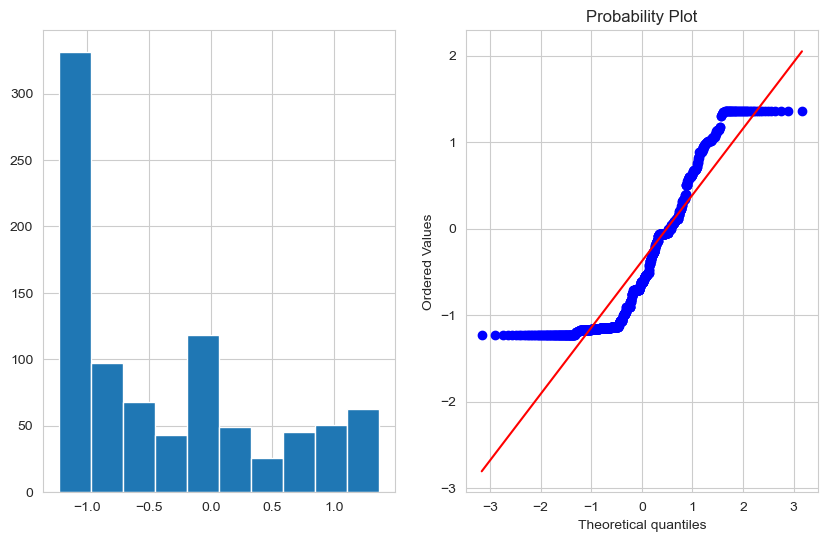

In [86]:
df_standardscaler['Fare_log'] = np.log(df_standardscaler['Fare']+1)
plot_data(df_standardscaler,'Fare_log')

In [87]:
df_standardscaler

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,Age_log,Fare_log
0,-1.581285,-0.789272,0.827377,-0.591644,0.695388,-0.521469,-0.706066,0.737695,-0.307562,0.619306,NaN,-1.224400
1,-1.581285,1.266990,-1.566107,0.749078,0.695388,-0.521469,1.481461,-1.355574,-0.307562,-1.614710,-0.288913,0.908848
2,-1.581285,1.266990,0.827377,-0.256464,-0.574265,-0.521469,-0.683006,-1.355574,-0.307562,0.619306,NaN,-1.148874
3,-1.581285,1.266990,-1.566107,0.497692,0.695388,-0.521469,0.860277,-1.355574,-0.307562,0.619306,-0.697773,0.620726
4,-1.581285,-0.789272,0.827377,0.497692,-0.574265,-0.521469,-0.678736,0.737695,-0.307562,0.619306,-0.697773,-1.135493
...,...,...,...,...,...,...,...,...,...,...,...,...
886,1.581285,-0.789272,-0.369365,-0.172669,-0.574265,-0.521469,-0.509633,0.737695,-0.307562,0.619306,NaN,-0.712600
887,1.581285,1.266990,-1.566107,-0.843030,-0.574265,-0.521469,0.071127,-1.355574,-0.307562,0.619306,NaN,0.068712
888,1.581285,-0.789272,0.827377,-0.340259,0.695388,2.495604,-0.152636,-1.355574,-0.307562,0.619306,NaN,-0.165625
889,1.581285,1.266990,-1.566107,-0.256464,-0.574265,-0.521469,0.071127,0.737695,-0.307562,-1.614710,NaN,0.068712


In [88]:
df_standardscaler.drop(['Age_log'], inplace=True, axis=1)

In [89]:
df_standardscaler

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,Fare_log
0,-1.581285,-0.789272,0.827377,-0.591644,0.695388,-0.521469,-0.706066,0.737695,-0.307562,0.619306,-1.224400
1,-1.581285,1.266990,-1.566107,0.749078,0.695388,-0.521469,1.481461,-1.355574,-0.307562,-1.614710,0.908848
2,-1.581285,1.266990,0.827377,-0.256464,-0.574265,-0.521469,-0.683006,-1.355574,-0.307562,0.619306,-1.148874
3,-1.581285,1.266990,-1.566107,0.497692,0.695388,-0.521469,0.860277,-1.355574,-0.307562,0.619306,0.620726
4,-1.581285,-0.789272,0.827377,0.497692,-0.574265,-0.521469,-0.678736,0.737695,-0.307562,0.619306,-1.135493
...,...,...,...,...,...,...,...,...,...,...,...
886,1.581285,-0.789272,-0.369365,-0.172669,-0.574265,-0.521469,-0.509633,0.737695,-0.307562,0.619306,-0.712600
887,1.581285,1.266990,-1.566107,-0.843030,-0.574265,-0.521469,0.071127,-1.355574,-0.307562,0.619306,0.068712
888,1.581285,-0.789272,0.827377,-0.340259,0.695388,2.495604,-0.152636,-1.355574,-0.307562,0.619306,-0.165625
889,1.581285,1.266990,-1.566107,-0.256464,-0.574265,-0.521469,0.071127,0.737695,-0.307562,-1.614710,0.068712


In [90]:
# we can now drop the Fare feature beacause we have already transformed it
df_standardscaler.drop(['Fare'],axis=1,inplace=True )

In [91]:
df_standardscaler.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,male,Q,S,Fare_log
0,-1.581285,-0.789272,0.827377,-0.591644,0.695388,-0.521469,0.737695,-0.307562,0.619306,-1.224400
1,-1.581285,1.266990,-1.566107,0.749078,0.695388,-0.521469,-1.355574,-0.307562,-1.614710,0.908848
2,-1.581285,1.266990,0.827377,-0.256464,-0.574265,-0.521469,-1.355574,-0.307562,0.619306,-1.148874
3,-1.581285,1.266990,-1.566107,0.497692,0.695388,-0.521469,-1.355574,-0.307562,0.619306,0.620726
4,-1.581285,-0.789272,0.827377,0.497692,-0.574265,-0.521469,0.737695,-0.307562,0.619306,-1.135493
